In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier

In [ ]:
url='https://drive.google.com/file/d/1U6LJH5RmifgPaRCTgSWiKgT6l85fOnEz/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
trained_df = pd.read_csv(url)
data = trained_df.copy()

In [ ]:
data

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,25129,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,11,48,7,1
25130,25130,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,1,2.0,23,34,4,1
25131,25131,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,1,0,1,1,2.0,32,34,4,1
25132,25132,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,9,49,2,1


# **I. Exploratary Data Analysis**

## **1.1. Explore data**

In [ ]:
print(data.shape)
print(data.columns)

(25134, 20)
Index(['Unnamed: 0', 'ID', 'GENDER', 'CAR', 'REALITY', 'NO_OF_CHILD', 'INCOME',
       'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE',
       'FLAG_MOBIL', 'WORK_PHONE', 'PHONE', 'E_MAIL', 'FAMILY SIZE',
       'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED', 'TARGET'],
      dtype='object')


We have 25134 records in this dataset with above 20 columns


In [ ]:
data.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [ ]:
data['TARGET'] = data['TARGET'].map({0: 'Not Fraud', 1: 'Fraud'})

In [ ]:
data['TARGET'].value_counts()

TARGET
Not Fraud    24712
Fraud          422
Name: count, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      25134 non-null  int64  
 1   ID              25134 non-null  int64  
 2   GENDER          25134 non-null  object 
 3   CAR             25134 non-null  object 
 4   REALITY         25134 non-null  object 
 5   NO_OF_CHILD     25134 non-null  int64  
 6   INCOME          25134 non-null  float64
 7   INCOME_TYPE     25134 non-null  object 
 8   EDUCATION_TYPE  25134 non-null  object 
 9   FAMILY_TYPE     25134 non-null  object 
 10  HOUSE_TYPE      25134 non-null  object 
 11  FLAG_MOBIL      25134 non-null  int64  
 12  WORK_PHONE      25134 non-null  int64  
 13  PHONE           25134 non-null  int64  
 14  E_MAIL          25134 non-null  int64  
 15  FAMILY SIZE     25134 non-null  float64
 16  BEGIN_MONTH     25134 non-null  int64  
 17  AGE             25134 non-null 

Data have no any null values -> good dataset

In [ ]:
data.nunique()

Unnamed: 0        25134
ID                25134
GENDER                2
CAR                   2
REALITY               2
NO_OF_CHILD           9
INCOME              195
INCOME_TYPE           5
EDUCATION_TYPE        5
FAMILY_TYPE           5
HOUSE_TYPE            6
FLAG_MOBIL            1
WORK_PHONE            2
PHONE                 2
E_MAIL                2
FAMILY SIZE          10
BEGIN_MONTH          61
AGE                  47
YEARS_EMPLOYED       43
TARGET                2
dtype: int64

We need to drop column 'FLAG_MOBIL' because it have only one values and 'Unnamed: 0' because we already have indeces. Consequently, this attribute have no value.

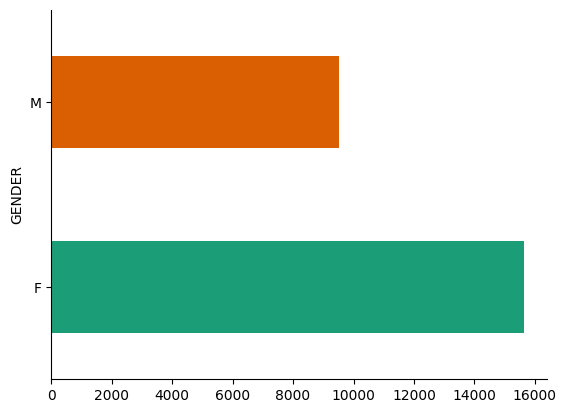

In [ ]:
# @title GENDER

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('GENDER').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

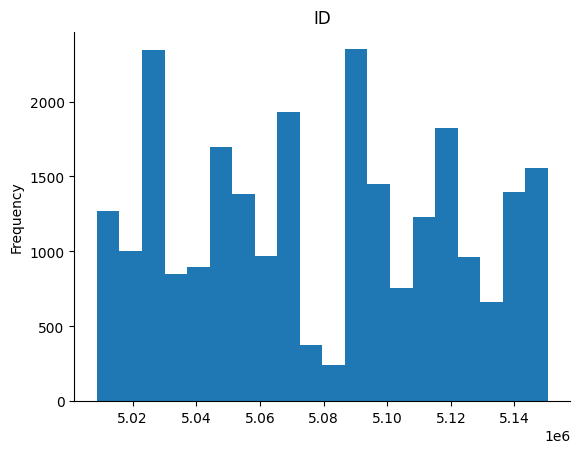

In [ ]:
# @title ID

from matplotlib import pyplot as plt
data['ID'].plot(kind='hist', bins=20, title='ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

## **1.2. Data visualization**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sao chép dữ liệu và chuyển đổi các biến phân loại thành số nguyên
label_encoder = LabelEncoder()
data2 = data.copy()
for col in data2.columns:
    if data2[col].dtype == 'object':
        data2[col] = label_encoder.fit_transform(data2[col])

# Tách dữ liệu thành features và target
X = data2.drop(columns=['TARGET', 'ID', 'Unnamed: 0'])
y = data2['TARGET']

# Kết hợp features và target thành DataFrame
df = pd.concat([X, y], axis=1)

# Tính toán hệ số tương quan
correlation = df.corr()

# In ra hệ số tương quan với biến target
print(correlation['TARGET'])


GENDER           -0.020708
CAR              -0.000274
REALITY           0.021743
NO_OF_CHILD       0.000867
INCOME           -0.006530
INCOME_TYPE       0.002922
EDUCATION_TYPE    0.008057
FAMILY_TYPE      -0.020887
HOUSE_TYPE       -0.002462
FLAG_MOBIL             NaN
WORK_PHONE       -0.005869
PHONE            -0.003023
E_MAIL           -0.000537
FAMILY SIZE       0.005587
BEGIN_MONTH      -0.060713
AGE               0.007880
YEARS_EMPLOYED    0.033367
TARGET            1.000000
Name: TARGET, dtype: float64


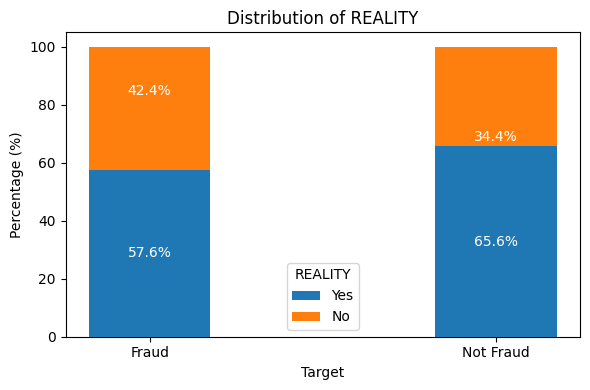

In [ ]:
REALITY_df = data[['REALITY','TARGET']]
REALITY_df = REALITY_df.groupby(['TARGET', 'REALITY']).size().unstack(fill_value=0).reset_index()

REALITY_df['Y_percentage'] = (REALITY_df['Y'] / (REALITY_df['Y'] + REALITY_df['N'])) * 100
REALITY_df['N_percentage'] = (REALITY_df['N'] / (REALITY_df['Y'] + REALITY_df['N'])) * 100

# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(6, 4))

bar_width = 0.35
index = np.arange(len(REALITY_df['TARGET'].unique()))

ax.bar(index, REALITY_df['Y_percentage'], bar_width, label='Yes', zorder=3)
ax.bar(index, REALITY_df['N_percentage'], bar_width, bottom=REALITY_df['Y_percentage'], label='No', zorder=3)

# Thêm tiêu đề và nhãn
ax.set_xlabel('Target')
ax.set_ylabel('Percentage (%)')
ax.set_title('Distribution of REALITY')
ax.set_xticks(index)
ax.set_xticklabels(REALITY_df['TARGET'].unique())
ax.legend(title = 'REALITY')

# Thêm nhãn tỷ lệ
for i, value in enumerate(REALITY_df['Y_percentage']):
    ax.text(i, value / 2, f'{value:.1f}%', ha='center', va='center', color='white', zorder=10)

for i, value in enumerate(REALITY_df['N_percentage']):
    ax.text(i, value + value /1 , f'{value:.1f}%', ha='center', va='center', color='white', zorder=5)

plt.tight_layout()
plt.show()

    YEARS_EMPLOYED     TARGET  counts
0               10      Fraud      16
1               10  Not Fraud     997
2               11      Fraud       6
3               11  Not Fraud     755
4               12      Fraud      14
5               12  Not Fraud     552
6               13      Fraud       5
7               13  Not Fraud     514
8               14      Fraud       2
9               14  Not Fraud     444
10              15      Fraud       4
11              15  Not Fraud     563
12              16      Fraud       2
13              16  Not Fraud     240
14              17      Fraud       4
15              17  Not Fraud     243
16              18      Fraud       2
17              18  Not Fraud     185
18              19      Fraud       2
19              19  Not Fraud     254
20              20      Fraud       5
21              20  Not Fraud     284


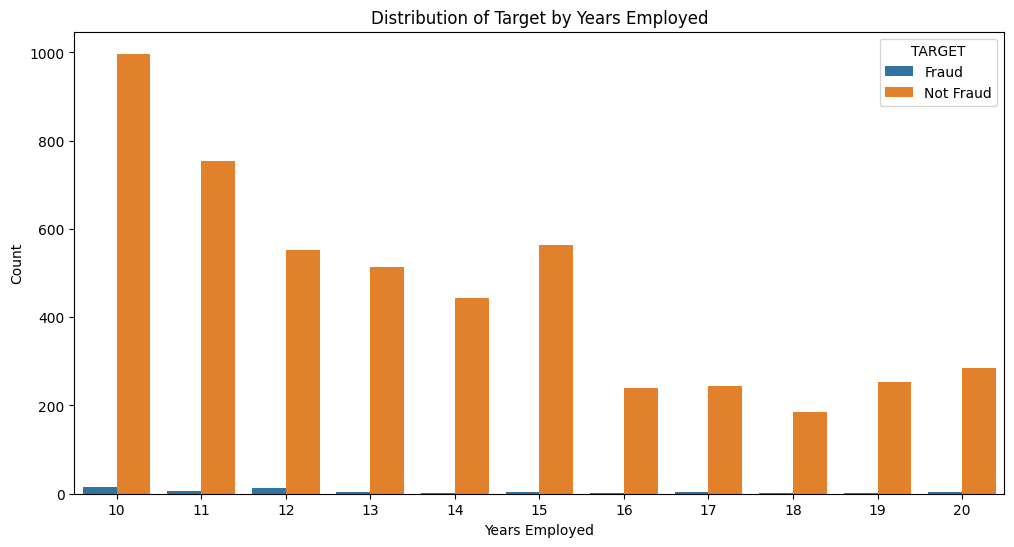

In [ ]:
#Lets see if years employed has any effect on target
# Lọc dữ liệu cho YEARS_EMPLOYED từ 10 đến 20
filtered_data = data[(data['YEARS_EMPLOYED'] >= 10) & (data['YEARS_EMPLOYED'] <= 20)]

# Tính tổng số lượng các giá trị TARGET theo YEARS_EMPLOYED
employ_data = filtered_data.groupby(['YEARS_EMPLOYED', 'TARGET']).size().reset_index(name='counts')
print(employ_data)
plt.figure(figsize=(12, 6))
sns.barplot(x='YEARS_EMPLOYED', y='counts', hue='TARGET', data=employ_data)
plt.xlabel('Years Employed')
plt.ylabel('Count')
plt.title('Distribution of Target by Years Employed')
plt.show()

    AGE     TARGET  counts
0    25      Fraud      12
1    25  Not Fraud     380
2    26      Fraud       9
3    26  Not Fraud     401
4    27      Fraud      11
5    27  Not Fraud     629
6    28      Fraud      17
7    28  Not Fraud     882
8    29      Fraud      30
9    29  Not Fraud     827
10   30      Fraud      21
11   30  Not Fraud     868
12   31      Fraud       9
13   31  Not Fraud     726
14   32      Fraud       9
15   32  Not Fraud     798
16   33      Fraud      15
17   33  Not Fraud     850
18   34      Fraud      17
19   34  Not Fraud     874
20   35      Fraud      15
21   35  Not Fraud     854
22   36      Fraud       7
23   36  Not Fraud     766
24   37      Fraud       6
25   37  Not Fraud     926
26   38      Fraud      16
27   38  Not Fraud     838
28   39      Fraud      10
29   39  Not Fraud    1000
30   40      Fraud      20
31   40  Not Fraud     879
32   41      Fraud      15
33   41  Not Fraud     916
34   42      Fraud      13
35   42  Not Fraud     844
3

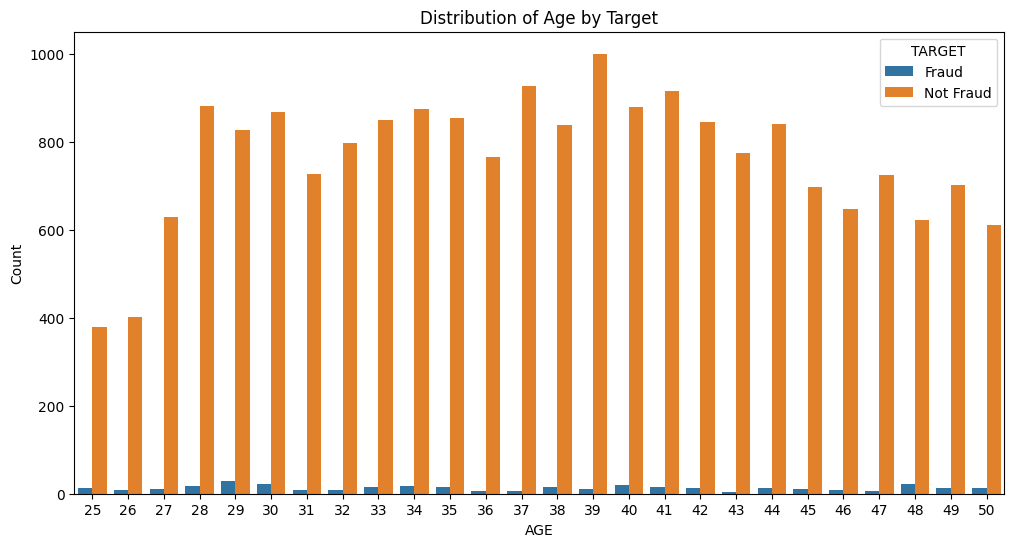

In [ ]:
#Lets check the relation between age and Fraud
age_data = data[(data.AGE >= 25) & (data.AGE <= 50)]
age_data = age_data.groupby(['AGE','TARGET']).size().reset_index(name='counts')
print(age_data)
plt.figure(figsize=(12, 6))
sns.barplot(x='AGE', y='counts', hue='TARGET', data=age_data)
plt.xlabel('AGE')
plt.ylabel('Count')
plt.title('Distribution of Age by Target')
plt.show()

<Axes: xlabel='BEGIN_MONTH', ylabel='0'>

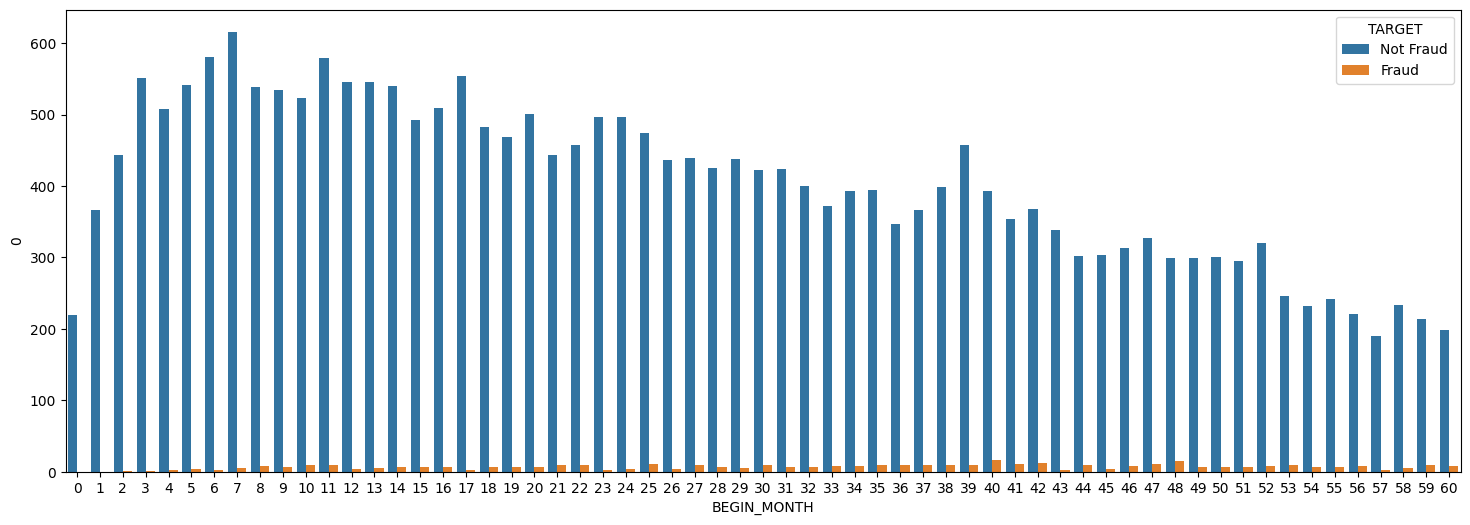

In [ ]:

#Lets check the relation between BEGIN_MONTH and Fraud
BEGIN_MONTH_data = data.groupby(['BEGIN_MONTH','TARGET']).size().reset_index()
plt.figure(figsize=(18,6))
sns.barplot(x='BEGIN_MONTH',y=0,hue='TARGET',data=BEGIN_MONTH_data)

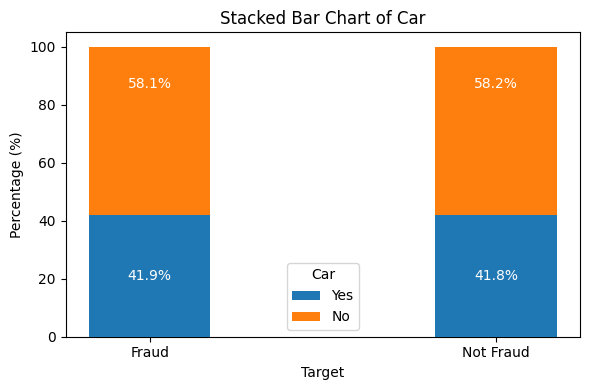

In [ ]:
car_df = data[['CAR','TARGET']]
car_df = car_df.groupby(['TARGET', 'CAR']).size().unstack(fill_value=0).reset_index()

car_df['Y_percentage'] = (car_df['Y'] / (car_df['Y'] + car_df['N'])) * 100
car_df['N_percentage'] = (car_df['N'] / (car_df['Y'] + car_df['N'])) * 100

# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(6, 4))

bar_width = 0.35
index = np.arange(len(car_df['TARGET'].unique()))

ax.bar(index, car_df['Y_percentage'], bar_width, label='Yes', zorder=3)
ax.bar(index, car_df['N_percentage'], bar_width, bottom=car_df['Y_percentage'], label='No', zorder=3)

# Thêm tiêu đề và nhãn
ax.set_xlabel('Target')
ax.set_ylabel('Percentage (%)')
ax.set_title('Stacked Bar Chart of Car')
ax.set_xticks(index)
ax.set_xticklabels(car_df['TARGET'].unique())
ax.legend(title = 'Car')

# Thêm nhãn tỷ lệ
for i, value in enumerate(car_df['Y_percentage']):
    ax.text(i, value / 2, f'{value:.1f}%', ha='center', va='center', color='white', zorder=5)

for i, value in enumerate(car_df['N_percentage']):
    ax.text(i, value + value / 2, f'{value:.1f}%', ha='center', va='center', color='white', zorder=5)

plt.tight_layout()
plt.show()

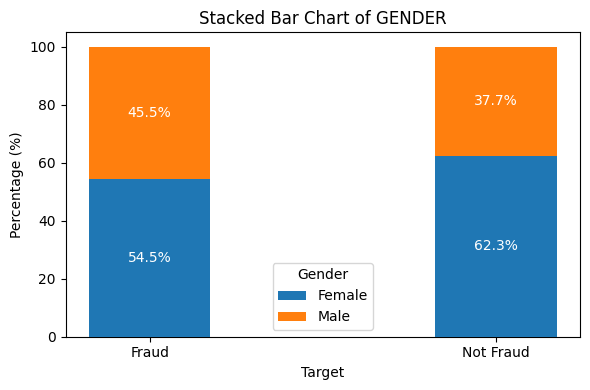

In [ ]:
gender_df = data[['GENDER','TARGET']]
gender_df = gender_df.groupby(['TARGET', 'GENDER']).size().unstack(fill_value=0).reset_index()

gender_df['F_percentage'] = (gender_df['F'] / (gender_df['F'] + gender_df['M'])) * 100
gender_df['M_percentage'] = (gender_df['M'] / (gender_df['F'] + gender_df['M'])) * 100

# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(6, 4))

bar_width = 0.35
index = np.arange(len(gender_df['TARGET'].unique()))

ax.bar(index, gender_df['F_percentage'], bar_width, label='Female', zorder=3)
ax.bar(index, gender_df['M_percentage'], bar_width, bottom=gender_df['F_percentage'], label='Male', zorder=3)

# Thêm tiêu đề và nhãn
ax.set_xlabel('Target')
ax.set_ylabel('Percentage (%)')
ax.set_title('Stacked Bar Chart of GENDER')
ax.set_xticks(index)
ax.set_xticklabels(gender_df['TARGET'].unique())
ax.legend(title='Gender')

# Thêm nhãn tỷ lệ
for i, value in enumerate(gender_df['F_percentage']):
    ax.text(i, value / 2, f'{value:.1f}%', ha='center', va='center', color='white', zorder=5)

for i, value in enumerate(gender_df['M_percentage']):
    ax.text(i, gender_df['F_percentage'][i] + value / 2, f'{value:.1f}%', ha='center', va='center', color='white', zorder=5)

plt.tight_layout()
plt.show()

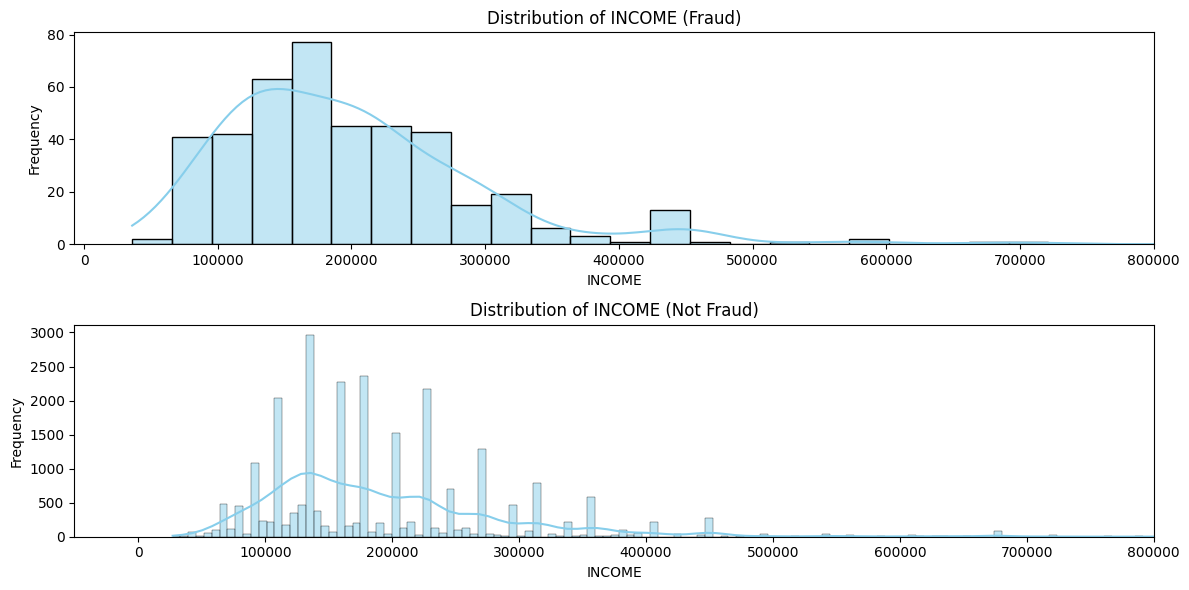

In [ ]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))

# Biểu đồ cho TARGET = 0
plt.subplot(2, 1, 1)
sns.histplot(data[data['TARGET'] == 'Fraud']['INCOME'], kde=True, color='skyblue')
plt.title('Distribution of INCOME (Fraud)')
plt.xlabel('INCOME')
plt.ylabel('Frequency')
plt.xlim(right=800000)

# Biểu đồ cho TARGET = 1
plt.subplot(2, 1, 2)
sns.histplot(data[data['TARGET'] == 'Not Fraud']['INCOME'], kde=True, color='skyblue')
plt.title('Distribution of INCOME (Not Fraud)')
plt.xlabel('INCOME')
plt.ylabel('Frequency')
plt.xlim(right=800000)

plt.tight_layout()
plt.show()

<ipython-input-21-d0098a0741c6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='INCOME_TYPE', data=data[data['TARGET'] == 'Fraud'], ax=axes[0], palette='coolwarm')
<ipython-input-21-d0098a0741c6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='INCOME_TYPE', data=data[data['TARGET'] == 'Not Fraud'], ax=axes[1], palette='coolwarm')


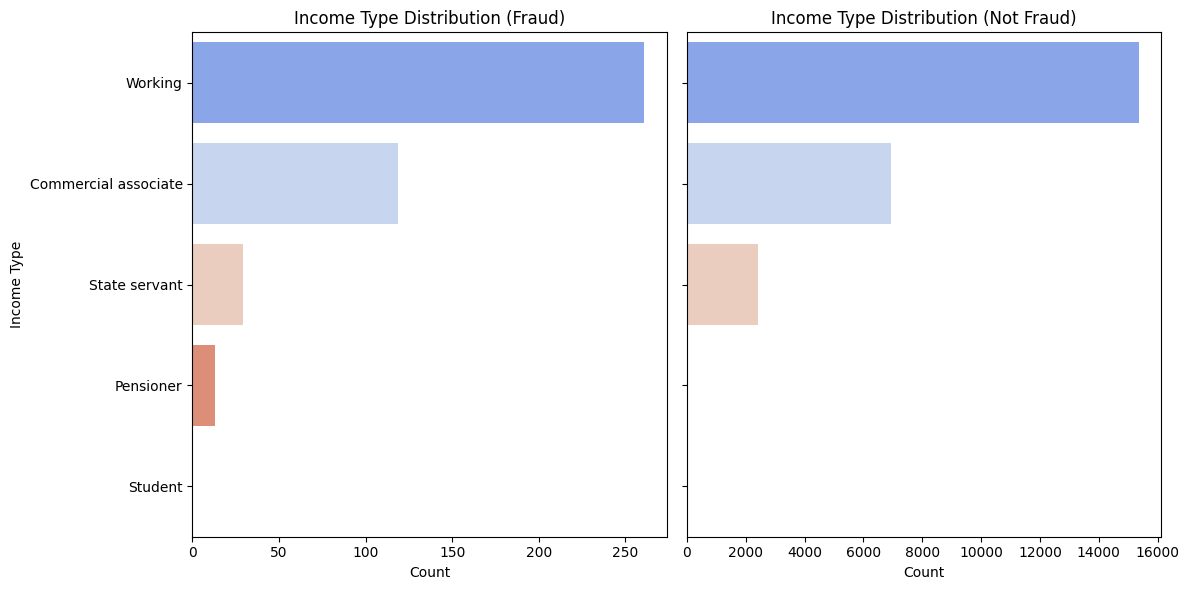

In [ ]:
# Tạo figure và axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Biểu đồ cho TARGET = 'Fraud'
sns.countplot(y='INCOME_TYPE', data=data[data['TARGET'] == 'Fraud'], ax=axes[0], palette='coolwarm')
axes[0].set_title('Income Type Distribution (Fraud)')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Income Type')

# Biểu đồ cho TARGET = 'Not Fraud'
sns.countplot(y='INCOME_TYPE', data=data[data['TARGET'] == 'Not Fraud'], ax=axes[1], palette='coolwarm')
axes[1].set_title('Income Type Distribution (Not Fraud)')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show();

<ipython-input-22-eb79e87b898f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='EDUCATION_TYPE', data=data[data['TARGET'] == 'Fraud'], ax=axes[0], palette='coolwarm')
<ipython-input-22-eb79e87b898f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='EDUCATION_TYPE', data=data[data['TARGET'] == 'Not Fraud'], ax=axes[1], palette='coolwarm')


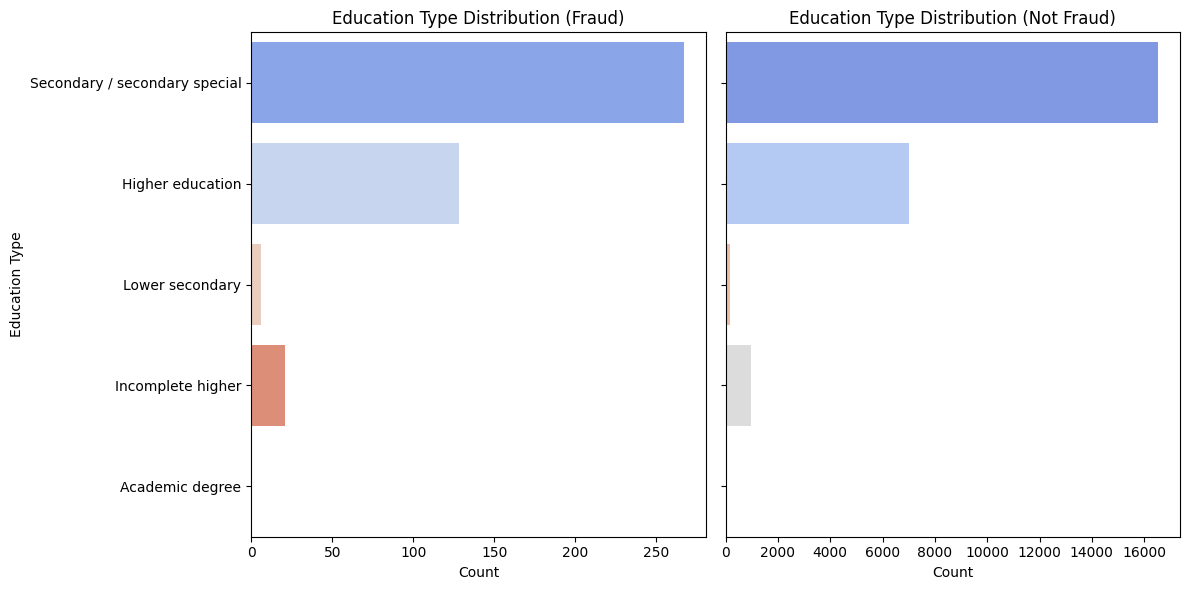

In [ ]:
# Tạo figure và axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Biểu đồ cho TARGET = 'Fraud'
sns.countplot(y='EDUCATION_TYPE', data=data[data['TARGET'] == 'Fraud'], ax=axes[0], palette='coolwarm')
axes[0].set_title('Education Type Distribution (Fraud)')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Education Type')

# Biểu đồ cho TARGET = 'Not Fraud'
sns.countplot(y='EDUCATION_TYPE', data=data[data['TARGET'] == 'Not Fraud'], ax=axes[1], palette='coolwarm')
axes[1].set_title('Education Type Distribution (Not Fraud)')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

<ipython-input-23-b83d70edb9fd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='FAMILY_TYPE', data=data[data['TARGET'] == 'Fraud'], ax=axes[0], palette='coolwarm')
<ipython-input-23-b83d70edb9fd>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='FAMILY_TYPE', data=data[data['TARGET'] == 'Not Fraud'], ax=axes[1], palette='coolwarm')


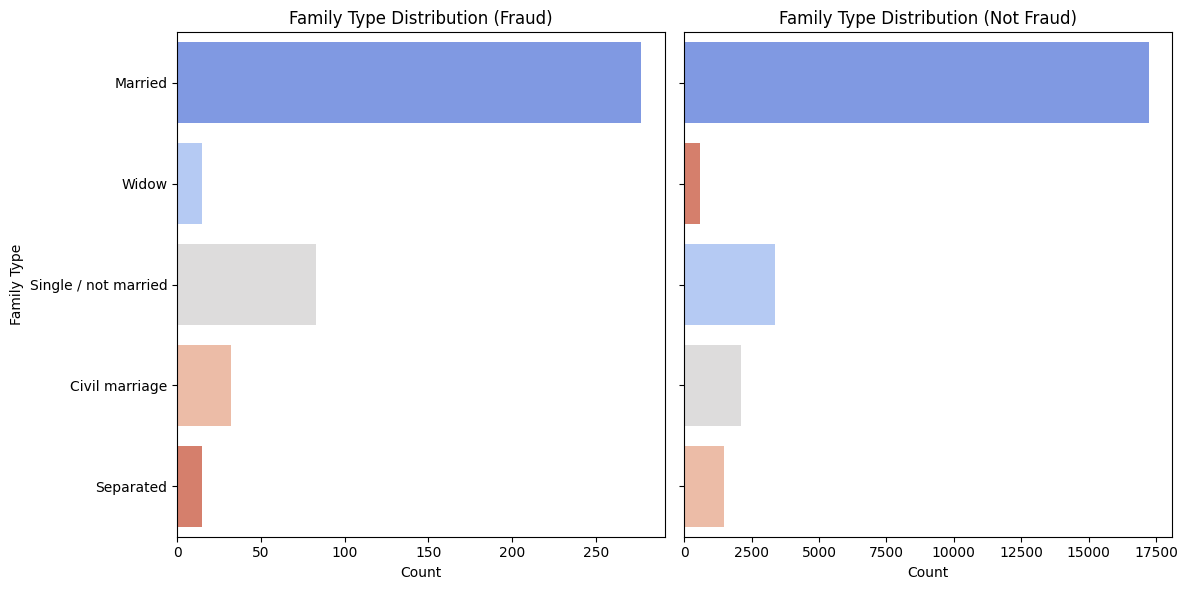

In [ ]:
# Tạo figure và axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Biểu đồ cho TARGET = 'Fraud'
sns.countplot(y='FAMILY_TYPE', data=data[data['TARGET'] == 'Fraud'], ax=axes[0], palette='coolwarm')
axes[0].set_title('Family Type Distribution (Fraud)')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Family Type')

# Biểu đồ cho TARGET = 'Not Fraud'
sns.countplot(y='FAMILY_TYPE', data=data[data['TARGET'] == 'Not Fraud'], ax=axes[1], palette='coolwarm')
axes[1].set_title('Family Type Distribution (Not Fraud)')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show();

<ipython-input-24-125513e1cd02>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='HOUSE_TYPE', data=data[data['TARGET'] == 'Fraud'], ax=axes[0], palette='coolwarm')
<ipython-input-24-125513e1cd02>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='HOUSE_TYPE', data=data[data['TARGET'] == 'Not Fraud'], ax=axes[1], palette='coolwarm')


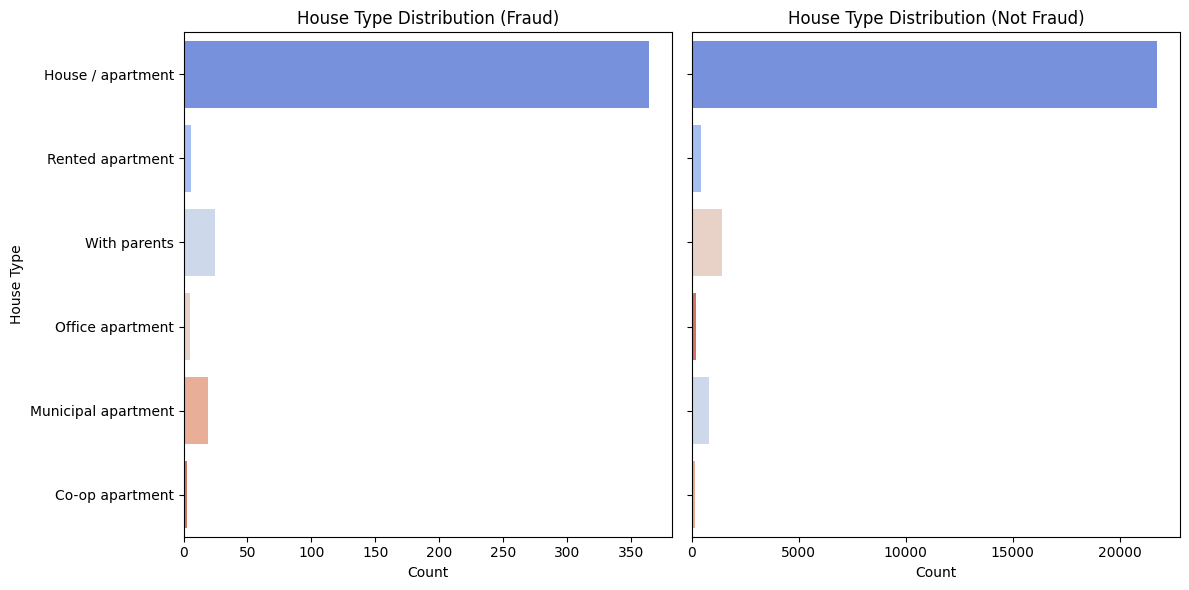

In [ ]:
# Tạo figure và axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Biểu đồ cho TARGET = 'Fraud'
sns.countplot(y='HOUSE_TYPE', data=data[data['TARGET'] == 'Fraud'], ax=axes[0], palette='coolwarm')
axes[0].set_title('House Type Distribution (Fraud)')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('House Type')

# Biểu đồ cho TARGET = 'Not Fraud'
sns.countplot(y='HOUSE_TYPE', data=data[data['TARGET'] == 'Not Fraud'], ax=axes[1], palette='coolwarm')
axes[1].set_title('House Type Distribution (Not Fraud)')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show();

# **II. Preprocessing**

### **2.1 Drop unnecessary columns: ID, Unnamed: 0, FLAG_MOBIL**

In [ ]:
data = trained_df.copy()

In [ ]:
data[['ID', 'Unnamed: 0', 'FLAG_MOBIL']]

,ID,Unnamed: 0,FLAG_MOBIL
0,5008806,0,1
1,5008808,1,1
2,5008809,2,1
3,5008810,3,1
4,5008811,4,1
...,...,...,...
25129,5149828,25129,1
25130,5149834,25130,1
25131,5149838,25131,1
25132,5150049,25132,1


In [ ]:
data.drop(columns=['ID','Unnamed: 0','FLAG_MOBIL'], inplace=True)
data

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,2.0,29,59,3,0
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1.0,4,52,8,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1.0,26,52,8,0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1.0,26,52,8,0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1.0,38,52,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,2.0,11,48,7,1
25130,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,0,1,1,2.0,23,34,4,1
25131,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,0,1,1,2.0,32,34,4,1
25132,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,2.0,9,49,2,1


### **2.2 Encoding nominal variables**

In [ ]:
# Đọc dữ liệu
label_encoder = LabelEncoder()
data_encoded = data.copy()
for col in data_encoded.columns:
    if data_encoded[col].dtype == 'object':
        data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

In [ ]:
data_encoded

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,1,1,1,0,112500.0,4,4,1,1,0,0,0,2.0,29,59,3,0
1,0,0,1,0,270000.0,0,4,3,1,0,1,1,1.0,4,52,8,0
2,0,0,1,0,270000.0,0,4,3,1,0,1,1,1.0,26,52,8,0
3,0,0,1,0,270000.0,0,4,3,1,0,1,1,1.0,26,52,8,0
4,0,0,1,0,270000.0,0,4,3,1,0,1,1,1.0,38,52,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,1,1,1,0,315000.0,4,4,1,1,0,0,0,2.0,11,48,7,1
25130,0,0,1,0,157500.0,0,1,1,1,0,1,1,2.0,23,34,4,1
25131,0,0,1,0,157500.0,1,1,1,1,0,1,1,2.0,32,34,4,1
25132,0,0,1,0,283500.0,4,4,1,1,0,0,0,2.0,9,49,2,1


In [ ]:
data_encoded.nunique()

GENDER              2
CAR                 2
REALITY             2
NO_OF_CHILD         9
INCOME            195
INCOME_TYPE         5
EDUCATION_TYPE      5
FAMILY_TYPE         5
HOUSE_TYPE          6
WORK_PHONE          2
PHONE               2
E_MAIL              2
FAMILY SIZE        10
BEGIN_MONTH        61
AGE                47
YEARS_EMPLOYED     43
TARGET              2
dtype: int64

# **III. Algorithm Comparison**

## **3.1 Algorithm without resampling technique**

### **Decision Tree (DT)**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Tách các tính năng và nhãn
X = data_encoded.drop(columns=['TARGET'])
y = data_encoded['TARGET']

# Thiết lập k-fold cross-validation
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Huấn luyện mô hình Decision Tree và áp dụng cross-validation
model = DecisionTreeClassifier(random_state=42)

# Chạy mô hình Decision Tree và áp dụng cross-validation (đã được thực hiện trước đó)

# Tính các chỉ số đánh giá cho mỗi fold và lấy trung bình
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Tính trung bình của các chỉ số đánh giá
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1 = sum(f1_scores) / len(f1_scores)

# In ra các chỉ số đánh giá
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")


Mean Accuracy: 0.9714
Mean Precision: 0.1832
Mean Recall: 0.2056
Mean F1-Score: 0.1905


### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Tách các tính năng và nhãn
X = data_encoded.drop(columns=['TARGET'])
y = data_encoded['TARGET']

# Thiết lập k-fold cross-validation
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Thiết lập mô hình Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Tính các chỉ số đánh giá cho mỗi fold và lấy trung bình
rf_accuracies = []
rf_precisions = []
rf_recalls = []
rf_f1_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Huấn luyện mô hình
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    # Tính các chỉ số đánh giá
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    rf_accuracies.append(accuracy)
    rf_precisions.append(precision)
    rf_recalls.append(recall)
    rf_f1_scores.append(f1)

# Tính trung bình của các chỉ số đánh giá
mean_rf_accuracy = sum(rf_accuracies) / len(rf_accuracies)
mean_rf_precision = sum(rf_precisions) / len(rf_precisions)
mean_rf_recall = sum(rf_recalls) / len(rf_recalls)
mean_rf_f1 = sum(rf_f1_scores) / len(rf_f1_scores)

# In ra các chỉ số đánh giá
print("Random Forest Evaluation Metrics:")
print(f"Mean Accuracy: {mean_rf_accuracy:.4f}")
print(f"Mean Precision: {mean_rf_precision:.4f}")
print(f"Mean Recall: {mean_rf_recall:.4f}")
print(f"Mean F1-Score: {mean_rf_f1:.4f}")


Random Forest Evaluation Metrics:
Mean Accuracy: 0.9824
Mean Precision: 0.4194
Mean Recall: 0.1216
Mean F1-Score: 0.1843


### **Logistic Regression (LR)**

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
# Tách các tính năng và nhãn
X = data_encoded.drop('TARGET', axis=1)  # Các đặc trưng
y = data_encoded['TARGET']  # Biến mục tiêu

# Thiết lập k-fold cross-validation
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Thiết lập mô hình Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=10000)

# Tính các chỉ số đánh giá cho mỗi fold và lấy trung bình
lr_accuracies = []
lr_precisions = []
lr_recalls = []
lr_f1_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Huấn luyện mô hình
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    # Tính các chỉ số đánh giá
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    lr_accuracies.append(accuracy)
    lr_precisions.append(precision)
    lr_recalls.append(recall)
    lr_f1_scores.append(f1)

# Tính trung bình của các chỉ số đánh giá
mean_lr_accuracy = sum(lr_accuracies) / len(lr_accuracies)
mean_lr_precision = sum(lr_precisions) / len(lr_precisions)
mean_lr_recall = sum(lr_recalls) / len(lr_recalls)
mean_lr_f1 = sum(lr_f1_scores) / len(lr_f1_scores)

# In ra các chỉ số đánh giá
print("Logistic Regression Evaluation Metrics:")
print(f"Mean Accuracy: {mean_lr_accuracy:.4f}")
print(f"Mean Precision: {mean_lr_precision:.4f}")
print(f"Mean Recall: {mean_lr_recall:.4f}")
print(f"Mean F1-Score: {mean_lr_f1:.4f}")


Logistic Regression Evaluation Metrics:
Mean Accuracy: 0.9832
Mean Precision: 1.0000
Mean Recall: 0.0000
Mean F1-Score: 0.0000


### **K-Nearest Neighbors (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# Tách các tính năng và nhãn
X = data_encoded.drop('TARGET', axis=1)  # Các đặc trưng
y = data_encoded['TARGET']  # Biến mục tiêu

# Thiết lập k-fold cross-validation
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Thiết lập mô hình K-Nearest Neighbors
knn = KNeighborsClassifier()

# Tính các chỉ số đánh giá cho mỗi fold và lấy trung bình
knn_accuracies = []
knn_precisions = []
knn_recalls = []
knn_f1_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Huấn luyện mô hình
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Tính các chỉ số đánh giá
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    knn_accuracies.append(accuracy)
    knn_precisions.append(precision)
    knn_recalls.append(recall)
    knn_f1_scores.append(f1)

# Tính trung bình của các chỉ số đánh giá
mean_knn_accuracy = sum(knn_accuracies) / len(knn_accuracies)
mean_knn_precision = sum(knn_precisions) / len(knn_precisions)
mean_knn_recall = sum(knn_recalls) / len(knn_recalls)
mean_knn_f1 = sum(knn_f1_scores) / len(knn_f1_scores)

# In ra các chỉ số đánh giá
print("K-Nearest Neighbors Evaluation Metrics:")
print(f"Mean Accuracy: {mean_knn_accuracy:.4f}")
print(f"Mean Precision: {mean_knn_precision:.4f}")
print(f"Mean Recall: {mean_knn_recall:.4f}")
print(f"Mean F1-Score: {mean_knn_f1:.4f}")

K-Nearest Neighbors Evaluation Metrics:
Mean Accuracy: 0.9831
Mean Precision: 0.4900
Mean Recall: 0.0270
Mean F1-Score: 0.0498


### **Category Boosting (CatBoost)**

In [ ]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier


In [ ]:

# Tách các tính năng và nhãn
X = data_encoded.drop('TARGET', axis=1)  # Các đặc trưng
y = data_encoded['TARGET']  # Biến mục tiêu

# Thiết lập k-fold cross-validation
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Thiết lập mô hình CatBoost
model = CatBoostClassifier(random_state=42, verbose=0)

# Tính các chỉ số đánh giá cho mỗi fold và lấy trung bình
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Huấn luyện mô hình
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Tính các chỉ số đánh giá
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Tính trung bình của các chỉ số đánh giá
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1 = sum(f1_scores) / len(f1_scores)

# In ra các chỉ số đánh giá
print("CatBoost Evaluation Metrics with K-Fold Cross-Validation:")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")


CatBoost Evaluation Metrics with K-Fold Cross-Validation:
Mean Accuracy: 0.9841
Mean Precision: 0.6873
Mean Recall: 0.0939
Mean F1-Score: 0.1634


### **Artificial Neural Network (ANN)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Features and target variable
X = data_encoded.drop('TARGET', axis=1).values  # Features
y = data_encoded['TARGET'].values  # Target variable

# Define the K-Fold Cross-Validation
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Define lists to store evaluation metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Loop through each fold in K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]  # Training and testing features
    y_train, y_test = y[train_index], y[test_index]  # Training and testing targets

    # Define the ANN model
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model on the test set
    y_pred_proba = model.predict(X_test)
    y_pred = np.round(y_pred_proba).flatten()

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append evaluation metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calculate mean evaluation metrics
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1 = np.mean(f1_scores)

# Print mean evaluation metrics
print("ANN Evaluation Metrics with K-Fold Cross-Validation:")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")

79/79 [==============================] - 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79/79 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79/79 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79/79 [==============================] - 1s 4ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79/79 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79/79 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79/79 [==============================] - 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79/79 [==============================] - 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79/79 [==============================] - 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79/79 [==============================] - 0s 1ms/step
ANN Evaluation Metrics with K-Fold Cross-Validation:
Mean Accuracy: 0.9832
Mean Precision: 0.0000
Mean Recall: 0.0000
Mean F1-Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **3.2 Algorithms with resampling technique**

### **3.2.1 Random Undersampling (RUS)**







In [ ]:
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler

# Tách dữ liệu và nhãn
X = data_encoded.drop('TARGET', axis=1)
y = data_encoded['TARGET']

# Khởi tạo RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Áp dụng RandomUnderSampler lên dữ liệu
X_resampled, y_resampled = rus.fit_resample(X, y)

In [ ]:
# Thiết lập k-fold cross-validation
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)


#### **Decision Tree**

In [ ]:
# Huấn luyện mô hình Decision Tree và áp dụng cross-validation
model = DecisionTreeClassifier(random_state=42)

# Tính các chỉ số đánh giá cho mỗi fold và lấy trung bình
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in kf.split(X_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Tính trung bình của các chỉ số đánh giá
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1 = sum(f1_scores) / len(f1_scores)

# In ra các chỉ số đánh giá
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")

Mean Accuracy: 0.6243
Mean Precision: 0.6225
Mean Recall: 0.6350
Mean F1-Score: 0.6257


####**Random Forest**

In [ ]:
model = RandomForestClassifier(random_state=42)

# Tính các chỉ số đánh giá cho mỗi fold và lấy trung bình
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in kf.split(X_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Tính trung bình của các chỉ số đánh giá
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1 = sum(f1_scores) / len(f1_scores)

# In ra các chỉ số đánh giá
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")

Mean Accuracy: 0.6764
Mean Precision: 0.6791
Mean Recall: 0.6680
Mean F1-Score: 0.6716


#### **Category Boosting (CatBoost)**

In [ ]:
# Thiết lập mô hình CatBoost
model = CatBoostClassifier(random_state=42, verbose=0)

# Tính các chỉ số đánh giá cho mỗi fold và lấy trung bình
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in kf.split(X_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Tính trung bình của các chỉ số đánh giá
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1 = sum(f1_scores) / len(f1_scores)

# In ra các chỉ số đánh giá
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")


Mean Accuracy: 0.6670
Mean Precision: 0.6712
Mean Recall: 0.6581
Mean F1-Score: 0.6623


### **3.2.2 All K-Nearest Neighbors (AllKNN)**

In [ ]:
from imblearn.under_sampling import AllKNN

# Tách dữ liệu thành features (X) và labels (y)
X = data_encoded.drop('TARGET', axis=1)  # 'label' là cột mục tiêu
y = data_encoded['TARGET']

allknn = AllKNN()

# Áp dụng AllKNN để undersampling
X_resampled, y_resampled = allknn.fit_resample(X, y)

#### **Decision Tree (DT)**

In [ ]:
# Huấn luyện mô hình Decision Tree và áp dụng cross-validation
model = DecisionTreeClassifier(random_state=42)

# Tính các chỉ số đánh giá cho mỗi fold và lấy trung bình
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in kf.split(X_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Tính trung bình của các chỉ số đánh giá
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1 = sum(f1_scores) / len(f1_scores)

# In ra các chỉ số đánh giá
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")


Mean Accuracy: 0.9733
Mean Precision: 0.2523
Mean Recall: 0.2734
Mean F1-Score: 0.2610


#### **Random forest (RF)**

In [ ]:
# Huấn luyện mô hình Decision Tree và áp dụng cross-validation
model = RandomForestClassifier(random_state=42)

# Tính các chỉ số đánh giá cho mỗi fold và lấy trung bình
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in kf.split(X_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Tính trung bình của các chỉ số đánh giá
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1 = sum(f1_scores) / len(f1_scores)

# In ra các chỉ số đánh giá
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")


Mean Accuracy: 0.9848
Mean Precision: 0.8456
Mean Recall: 0.1635
Mean F1-Score: 0.2723


#### **Category Boosting (CatBoost)**

In [ ]:
# Thiết lập mô hình CatBoost
model = CatBoostClassifier(random_state=42, verbose=0)

# Tính các chỉ số đánh giá cho mỗi fold và lấy trung bình
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in kf.split(X_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Tính trung bình của các chỉ số đánh giá
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1 = sum(f1_scores) / len(f1_scores)

# In ra các chỉ số đánh giá
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")


Mean Accuracy: 0.9842
Mean Precision: 0.8889
Mean Recall: 0.1165
Mean F1-Score: 0.2010


### **3.2.3 Random Oversampling (ROS)**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

X = data_encoded.drop('TARGET', axis=1)
y = data_encoded['TARGET']
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)


#### **Decision Tree (DT)**

In [ ]:
# Huấn luyện mô hình Decision Tree và áp dụng cross-validation
model = DecisionTreeClassifier(random_state=42)

# Tính các chỉ số đánh giá cho mỗi fold và lấy trung bình
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in kf.split(X_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Tính trung bình của các chỉ số đánh giá
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1 = sum(f1_scores) / len(f1_scores)

# In ra các chỉ số đánh giá
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")


Mean Accuracy: 0.9920
Mean Precision: 0.9843
Mean Recall: 1.0000
Mean F1-Score: 0.9921


#### **Random Forest**

In [ ]:
# Huấn luyện mô hình Decision Tree và áp dụng cross-validation
model = RandomForestClassifier(random_state=42)

# Tính các chỉ số đánh giá cho mỗi fold và lấy trung bình
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in kf.split(X_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Tính trung bình của các chỉ số đánh giá
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1 = sum(f1_scores) / len(f1_scores)

# In ra các chỉ số đánh giá
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")


Mean Accuracy: 0.9968
Mean Precision: 0.9936
Mean Recall: 1.0000
Mean F1-Score: 0.9968


#### **Category Boosting (CatBoost)**

In [ ]:
# Thiết lập mô hình CatBoost
model = CatBoostClassifier(random_state=42, verbose=0)

# Tính các chỉ số đánh giá cho mỗi fold và lấy trung bình
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in kf.split(X_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Tính trung bình của các chỉ số đánh giá
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1 = sum(f1_scores) / len(f1_scores)

# In ra các chỉ số đánh giá
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")


Mean Accuracy: 0.9899
Mean Precision: 0.9801
Mean Recall: 1.0000
Mean F1-Score: 0.9900


### **3.2.4 Synthetic Minority Oversampling Technique (SMOTE)**

In [ ]:
from imblearn.over_sampling import SMOTE
X = data_encoded.drop('TARGET', axis=1)
y = data_encoded['TARGET']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#### **Decision Tree (DT)**

In [ ]:
# Huấn luyện mô hình Decision Tree và áp dụng cross-validation
model = DecisionTreeClassifier(random_state=42)

# Tính các chỉ số đánh giá cho mỗi fold và lấy trung bình
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in kf.split(X_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Tính trung bình của các chỉ số đánh giá
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1 = sum(f1_scores) / len(f1_scores)

# In ra các chỉ số đánh giá
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")


Mean Accuracy: 0.9794
Mean Precision: 0.9739
Mean Recall: 0.9852
Mean F1-Score: 0.9795


#### **Random Forest (RF)**

In [ ]:
# Huấn luyện mô hình Decision Tree và áp dụng cross-validation
model = RandomForestClassifier(random_state=42)

# Tính các chỉ số đánh giá cho mỗi fold và lấy trung bình
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in kf.split(X_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Tính trung bình của các chỉ số đánh giá
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1 = sum(f1_scores) / len(f1_scores)

# In ra các chỉ số đánh giá
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")


Mean Accuracy: 0.9913
Mean Precision: 0.9920
Mean Recall: 0.9905
Mean F1-Score: 0.9913


#### **Category Boosting (CatBoost)**

In [ ]:
# Thiết lập mô hình CatBoost
model = CatBoostClassifier(random_state=42, verbose=0)

# Tính các chỉ số đánh giá cho mỗi fold và lấy trung bình
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in kf.split(X_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Tính trung bình của các chỉ số đánh giá
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1 = sum(f1_scores) / len(f1_scores)

# In ra các chỉ số đánh giá
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")


Mean Accuracy: 0.9876
Mean Precision: 0.9873
Mean Recall: 0.9879
Mean F1-Score: 0.9876


### **3.2.5 SMOTE links Tomek (SMTomek)**

In [ ]:
from imblearn.combine import SMOTETomek
X = data_encoded.drop('TARGET', axis=1)
y = data_encoded['TARGET']
smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X, y)

#### **Decision Tree (DT)**

In [ ]:
# Huấn luyện mô hình Decision Tree và áp dụng cross-validation
model = DecisionTreeClassifier(random_state=42)

# Tính các chỉ số đánh giá cho mỗi fold và lấy trung bình
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in kf.split(X_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Tính trung bình của các chỉ số đánh giá
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1 = sum(f1_scores) / len(f1_scores)

# In ra các chỉ số đánh giá
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")


Mean Accuracy: 0.9799
Mean Precision: 0.9746
Mean Recall: 0.9854
Mean F1-Score: 0.9800


#### **Random Forest (RF)**

In [ ]:
# Huấn luyện mô hình Decision Tree và áp dụng cross-validation
model = RandomForestClassifier(random_state=42)

# Tính các chỉ số đánh giá cho mỗi fold và lấy trung bình
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in kf.split(X_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Tính trung bình của các chỉ số đánh giá
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1 = sum(f1_scores) / len(f1_scores)

# In ra các chỉ số đánh giá
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")


Mean Accuracy: 0.9918
Mean Precision: 0.9929
Mean Recall: 0.9906
Mean F1-Score: 0.9918


#### **Category Boosting (CatBoost)**

In [ ]:
# Thiết lập k-fold cross-validation
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Thiết lập mô hình CatBoost
model = CatBoostClassifier(random_state=42, verbose=0)

# Chạy mô hình CatBoost và áp dụng cross-validation (đã được thực hiện trước đó)
scores = cross_val_score(model, X_resampled, y_resampled, cv=kf, scoring='accuracy')

# Tính các chỉ số đánh giá cho mỗi fold và lấy trung bình
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in kf.split(X_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Tính trung bình của các chỉ số đánh giá
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1 = sum(f1_scores) / len(f1_scores)

# In ra các chỉ số đánh giá
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")


Mean Accuracy: 0.9881
Mean Precision: 0.9882
Mean Recall: 0.9879
Mean F1-Score: 0.9881
